In [1]:
# All the necessary libraries and modules were imported.
# Dataset is imported and converted into data frame using pandas library.
import pandas as pd

df=pd.read_excel('loan-predictionUC.csv (3) (2).xlsx')
# First five rows of the data frame are displayed.
df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Data frame's description is displayed.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [3]:
# Data frame's information is displayed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [4]:
# Here, all the attributes in the dataset are displayed with their total number of null values respectively.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:title={'center':'Missing Values Percentage'}, ylabel='Percentage'>

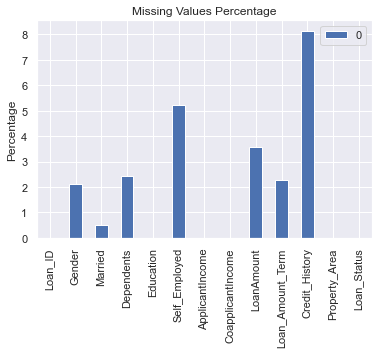

In [5]:
# All the necessary libraries and modules were imported.
# Here all the null values percentages for each attribute are plotted in the form of bar graph.
import seaborn as sns
import pandas as pd
sns.set()
miss_val_per=pd.DataFrame((df.isnull().sum()/len(df)*100))
miss_val_per.plot(kind="bar",title="Missing Values Percentage",ylabel="Percentage")                       

In [6]:
# All the necessary libraries and modules were imported.
# Here, all the attribute's null values are filled with sklearn imputer's mean and most_frequent strategies
# according to the requirement.(mean is used for numeric values attributes 
# and most_frequent strtegy is used for non-numeric values attributes)

from sklearn.impute import SimpleImputer
import numpy as np
imp_1=SimpleImputer(strategy="mean")
imp_2=SimpleImputer(strategy="most_frequent")
imp_2.fit(df[['Gender']])
df['Gender']=imp_2.fit_transform(df[['Gender']]).ravel()
imp_2.fit(df[['Married']])
df['Married']=imp_2.fit_transform(df[['Married']]).ravel()
imp_2.fit(df[['Self_Employed']])
df['Self_Employed']=imp_2.fit_transform(df[['Self_Employed']]).ravel()
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')
imp_1.fit(df[['Dependents']])
df['Dependents'] = np.round(imp_1.fit_transform(df[['Dependents']]).ravel())
imp_1.fit(df[['LoanAmount']])
df['LoanAmount'] = np.round(imp_1.fit_transform(df[['LoanAmount']]).ravel())
imp_1.fit(df[['Loan_Amount_Term']])
df['Loan_Amount_Term'] = np.round(imp_1.fit_transform(df[['Loan_Amount_Term']]).ravel())
imp_1.fit(df[['Credit_History']])
df['Credit_History'] = np.round(imp_1.fit_transform(df[['Credit_History']]).ravel())
df



ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [7]:
# Here, all the attributes in the dataset are displayed with their total number of null values respectively.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# All the necessary libraries and modules were imported.

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoder is used here to convert yes,no and Male,Female into binary 0's and 1's.
# Since we are analyzing the dataset numerically.
label_encoder=LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    df[column] = label_encoder.fit_transform(df[column])

# get_dummies function is used to convert dependets column to binary values(0,1) and they are sub-divided into 
# dependents 1.0 and 2.0(since number is greater than 2) 
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'], drop_first=True)

# Using Feature Engineering we merge ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Now, unnecessary ApplicantIncome and CoapplicantIncome columns were removed
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)
df

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.

In [9]:
# All the necessary libraries and modules were imported.
# Here different models are tested for their accuracy for given data set

from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)  # Features

y = df['Loan_Status']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# All the models were given in a dictionary and for loop is used to access each model individually
models = {
    "Logistic Regression": LogisticRegression(max_iter=3000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42)
}

# In for loop all the models were fitted with Trianing Data and tested with testing data and the predicted values are stored
# to generate confusion matrix, classification report and accuracy.
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm=confusion_matrix(y_test,y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("confusion matrix")
    print(cm)
    print(f"accuracy-score is {accuracy}")
    print("\n" + "-"*60 + "\n")

# Then, all the models were made to individually display their outputs and plots.
    if model_name == "DecisionTree":
        plt.figure(figsize=(20,10))
        plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=["N", "Y"])
        plt.show()

    if model_name in ["Logistic Regression", "SVM"]:
        # Plotting decision boundaries for Logistic Regression and SVM
        plt.figure(figsize=(10, 6))
        X_vis = X_train[['Credit_History', 'TotalIncome']].values
        y_vis = y_train
        model.fit(X_vis, y_vis)

        x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
        y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 100))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.8)
        plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k', marker='o')
        plt.xlabel('Credit_History')
        plt.ylabel('TotalIncome')
        plt.title(f'{model_name} Decision Boundary')
        plt.show()

    if model_name in ["RandomForest", "GradientBoosting"]:
        # Plotting feature importances for Random Forest and Gradient Boosting
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(10, 6))
        plt.title(f'{model_name} Feature Importances')
        plt.bar(range(X.shape[1]), importances[indices], align='center')
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    
        
#Linear Regression is written seperately instead of For loop because it does not have confusion matrix. So, only accuracy score is mentioned.
regr = LinearRegression()
regr.fit(X_train, y_train) 
y_pred = regr.predict(X_test)
print(f"accuracy-score is {regr.score(X_test, y_test)}") 

# Plotting coefficients for linear regression
plt.figure(figsize=(10, 6))
plt.barh(X.columns, regr.coef_)
plt.title("Linear Regression Coefficients")
plt.show()

# From the results, we can say Logistic Regression will perform better(because of high aaccuracy) for the given datset.

ImportError: DLL load failed while importing _arpack: The specified procedure could not be found.